### Lassa Fever Surveillance Analysis.

## Temporal Trends, Seasonality, and Mortality Analysis of Lassa Fever Cases in Nigeria.  

### Problem Statement

- Using weekly epidemiological surveillance data in Nigeria, this study seeks to evaluate patterns in confirmed cases and deaths over time.

- Specifically, the analysis investigates whether case counts demonstrate significant temporal trends, whether seasonal differences influence outbreak intensity, and whether mortality burden varies across years.


### Analytical Objectives

- Assess temporal trends in confirmed Lassa fever cases.

- Identify seasonal patterns in outbreaks.

- Estimate mortality burden via CFR (Case Fatality Rate). 

In [6]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Importing dataset
data = pd.read_csv('lassa_fever_data.csv')

In [4]:
# Getting an overview of the data
data.head()

,week_start_date,week_end_date,epi_year,epi_week,suspected_cases,confirmed_cases,probable_cases,deaths,extraction_method,extraction_timestamp,report_pdf_url
0,30/12/2019,05/01/2020,2020,1,98,18,0,2,manual,2025-12-01T02:00,https://ncdc.gov.ng/themes/common/files/sitrep...
1,06/01/2020,12/01/2020,2020,2,158,64,0,12,manual,2025-12-01T02:00,https://ncdc.gov.ng/themes/common/files/sitrep...
2,13/01/2020,19/01/2020,2020,3,159,81,0,10,manual,2025-12-01T02:00,https://ncdc.gov.ng/themes/common/files/sitrep...
3,20/01/2020,26/01/2020,2020,4,318,95,3,19,automated,2025-12-01T01:08:42.783211,https://ncdc.gov.ng/themes/common/files/sitrep...
4,27/01/2020,02/02/2020,2020,5,531,104,0,6,automated,2025-12-01T01:08:43.217629,https://ncdc.gov.ng/themes/common/files/sitrep...


In [5]:
# Data Description 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   week_start_date       313 non-null    object
 1   week_end_date         313 non-null    object
 2   epi_year              313 non-null    int64 
 3   epi_week              313 non-null    int64 
 4   suspected_cases       313 non-null    int64 
 5   confirmed_cases       313 non-null    int64 
 6   probable_cases        313 non-null    int64 
 7   deaths                313 non-null    int64 
 8   extraction_method     313 non-null    object
 9   extraction_timestamp  313 non-null    object
 10  report_pdf_url        313 non-null    object
dtypes: int64(6), object(5)
memory usage: 27.0+ KB


In [7]:
# Statistical information of the dataset
data.describe()

,epi_year,epi_week,suspected_cases,confirmed_cases,probable_cases,deaths
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,2022.492013,26.584665,152.760383,20.626198,0.169329,3.220447
std,1.713661,15.082891,111.765939,25.664706,0.588418,4.552327
min,2020.000000,1.000000,11.000000,0.000000,0.000000,0.000000
25%,2021.000000,14.000000,81.000000,6.000000,0.000000,0.000000
50%,2022.000000,27.000000,115.000000,10.000000,0.000000,1.000000
75%,2024.000000,40.000000,180.000000,22.000000,0.000000,4.000000
max,2025.000000,53.000000,694.000000,137.000000,3.000000,23.000000


In [8]:
# Dropping irrelevant columns; metadata columns are not needed for analysis. 
data = data.drop(columns=['extraction_method', 
                          'extraction_timestamp',
                         'report_pdf_url'])

In [9]:
# Validating data
data.head()

,week_start_date,week_end_date,epi_year,epi_week,suspected_cases,confirmed_cases,probable_cases,deaths
0,30/12/2019,05/01/2020,2020,1,98,18,0,2
1,06/01/2020,12/01/2020,2020,2,158,64,0,12
2,13/01/2020,19/01/2020,2020,3,159,81,0,10
3,20/01/2020,26/01/2020,2020,4,318,95,3,19
4,27/01/2020,02/02/2020,2020,5,531,104,0,6


In [60]:
# Checking data types
data['week_start_date'].head()
print(data['week_start_date'].dtype)

datetime64[ns]


In [11]:
# Convert Date Columns
data['week_start_date'] = pd.to_datetime(data['week_start_date'], dayfirst=True, errors='coerce')
data['week_end_date'] = pd.to_datetime(data['week_end_date'], dayfirst=True, errors='coerce')

In [12]:
# Checking for Missing Values
data.isnull().sum()

week_start_date    0
week_end_date      0
epi_year           0
epi_week           0
suspected_cases    0
confirmed_cases    0
probable_cases     0
deaths             0
dtype: int64

In [13]:
# Checking Duplicates 
data.duplicated().sum()

np.int64(0)

In [14]:
# Feature Engineering

data['year'] = data['week_start_date'].dt.year
data['month'] = data['week_start_date'].dt.month
data['quarter'] = data['week_start_date'].dt.quarter
data['week_of_year'] = data['week_start_date'].dt.isocalendar().week

In [15]:
# Create Time Index for Regression - time index acts as the numeric representation of time (represents the passage of time in numeric form).
# It allows regression to measure the direction of trend. 
# Regression requires numeric predictors which are not provided by dates alone. 
# So in summary, time index allows to formally test if there is a statistically significant trend over time?
data['time_index'] = range(len(data))
data['time_index']

0        0
1        1
2        2
3        3
4        4
      ... 
308    308
309    309
310    310
311    311
312    312
Name: time_index, Length: 313, dtype: int64

In [16]:
# Calculating Case Fatality Rate (CFR) - The proportion of confirmed cases that resulted in death.
# CFR reflects disease severity
data['CFR'] = np.where(
    data['confirmed_cases'] > 0,
    (data['deaths'] / data['confirmed_cases']) * 100, 0
)

In [17]:
data['CFR']

0      11.111111
1      18.750000
2      12.345679
3      20.000000
4       5.769231
         ...    
308     8.333333
309    24.242424
310    21.428571
311    23.809524
312    33.333333
Name: CFR, Length: 313, dtype: float64

In [18]:
# Rolling Mean (4-week moving average) - A rolling mean smooths short-term fluctuations and highlights the underlying trend. 
# It helps see true outbreak trend and sustained increase vs temporary spike. 
# The first 3 rows are having NaN values because a 4-week rolling mean needs 4 values. So the first rows are mathematically undefined. 

data['rolling_mean_cases'] = data['confirmed_cases'].rolling(4).mean()

In [19]:
data['rolling_mean_cases']

0        NaN
1        NaN
2        NaN
3      64.50
4      86.00
       ...  
308    17.50
309    23.25
310    25.50
311    26.50
312    27.25
Name: rolling_mean_cases, Length: 313, dtype: float64

#### Descriptive Statistics

- What is happening?

In [28]:
# Summary statistics
cols = ['confirmed_cases', 'deaths', 'CFR', 'suspected_cases']
data[cols].describe()



,confirmed_cases,deaths,CFR,suspected_cases
count,313.000000,313.000000,313.000000,313.000000
mean,20.626198,3.220447,15.725017,152.760383
std,25.664706,4.552327,15.997366,111.765939
min,0.000000,0.000000,0.000000,11.000000
25%,6.000000,0.000000,0.000000,81.000000
50%,10.000000,1.000000,12.500000,115.000000
75%,22.000000,4.000000,23.943662,180.000000
max,137.000000,23.000000,100.000000,694.000000


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Question 1- Which year has the highest number of confirmed cases and deaths? 

In [29]:
# Annual Totals - To compare year-to-year outbreak magnitude. 
annual_summary = data.groupby('year')[['confirmed_cases', 'deaths']].sum().reset_index()
print(annual_summary)

   year  confirmed_cases  deaths
0  2019               18       2
1  2020             1172     157
2  2021              511      77
3  2022             1042     144
4  2023             1271     210
5  2024             1365     217
6  2025             1077     201


From the Analysis, 2024 is the year of highest rate of confirmed cases and deaths (1365, 217).

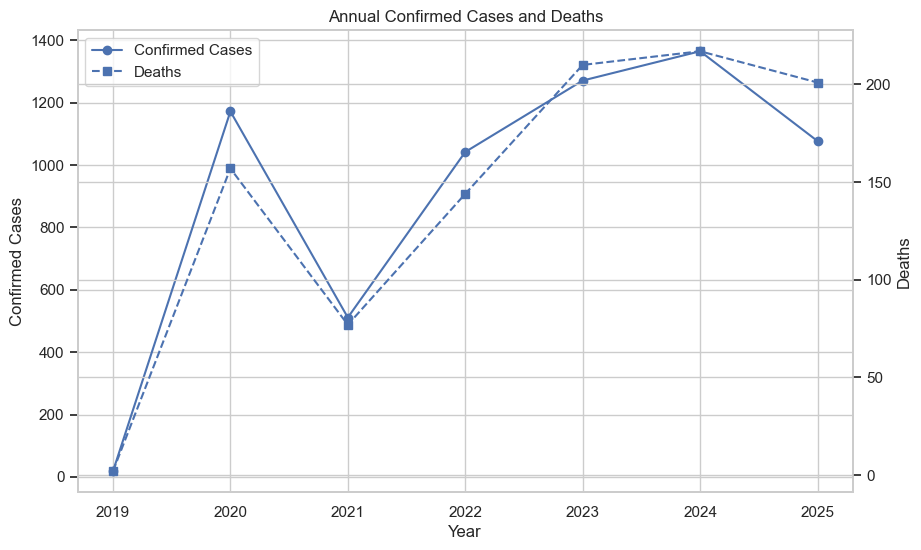

In [34]:
# Let's visualize
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(annual_summary['year'],
        annual_summary['confirmed_cases'],
        marker='o',
        label='Confirmed Cases')
ax1.set_xlabel('Year')
ax1.set_ylabel('Confirmed Cases')

ax2 = ax1.twinx()
ax2.plot(annual_summary['year'],
        annual_summary['deaths'],
        marker='s',
        linestyle='--',
        label='Deaths')
ax2.set_ylabel('Deaths')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Annual Confirmed Cases and Deaths')
plt.show()

Question 2 - Which month showcased the highest number of confirmed cases?

In [61]:
monthly_summary = data.groupby('month')[['confirmed_cases']].mean().reset_index()
print(monthly_summary)

    month  confirmed_cases
0       1        65.444444
1       2        64.583333
2       3        30.185185
3       4        12.320000
4       5         7.037037
5       6         6.692308
6       7         7.230769
7       8         6.592593
8       9         6.423077
9      10         7.923077
10     11        10.769231
11     12        24.346154


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_11896\2534265317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='confirmed_cases', data=monthly_summary, palette='Reds')


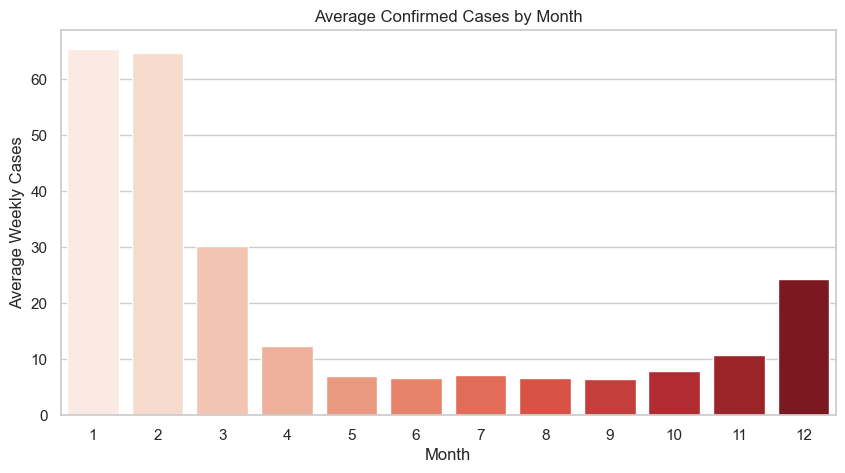

In [53]:
# Monthly Trends
monthly_summary = data.groupby('month')['confirmed_cases'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='confirmed_cases', data=monthly_summary, palette='Reds')
plt.title('Average Confirmed Cases by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Cases')
plt.show()

Insight - January (Month 1) showed the highest average number of confirmed cases. 

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_8416\3541771110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='confirmed_cases', data=data, palette='Pastel1')


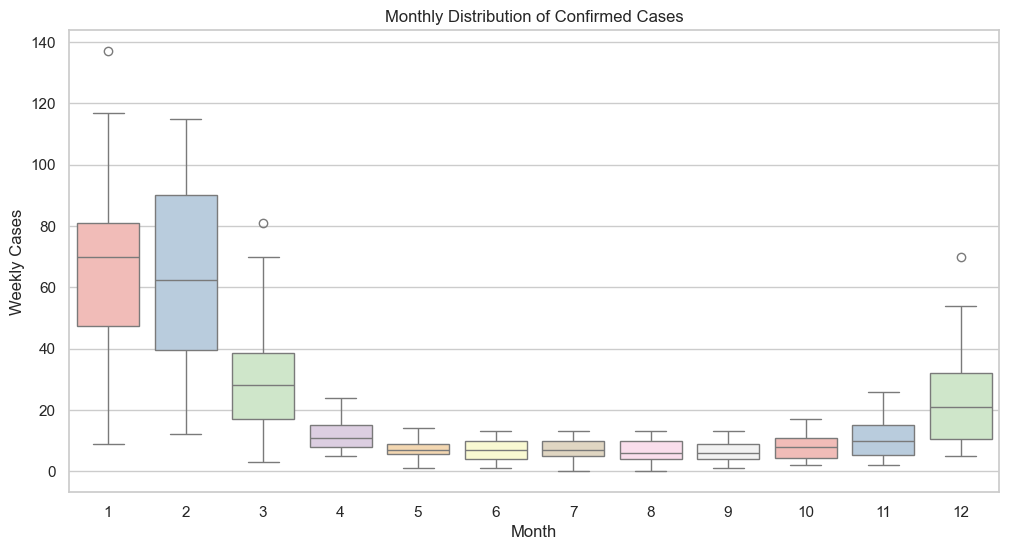

In [48]:
# Visualization of Monthly distribution of confirmed cases
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='confirmed_cases', data=data, palette='Pastel1')
plt.title('Monthly Distribution of Confirmed Cases')
plt.xlabel('Month')
plt.ylabel('Weekly Cases')
plt.show()

Insight - The monthly distribution of confirmed cases shows noticeable variability across months. 

- The second month exhibits a higher median number of confirmed cases compared to the first month, indicating increased transmission during the period.

- Several outliers are observed, reflecting weeks with unusually high case counts, possibly due to outbreak spikes.  

Question 3 - Are weekly confirmed cases increasing, decreasing, or remaining stable over time?

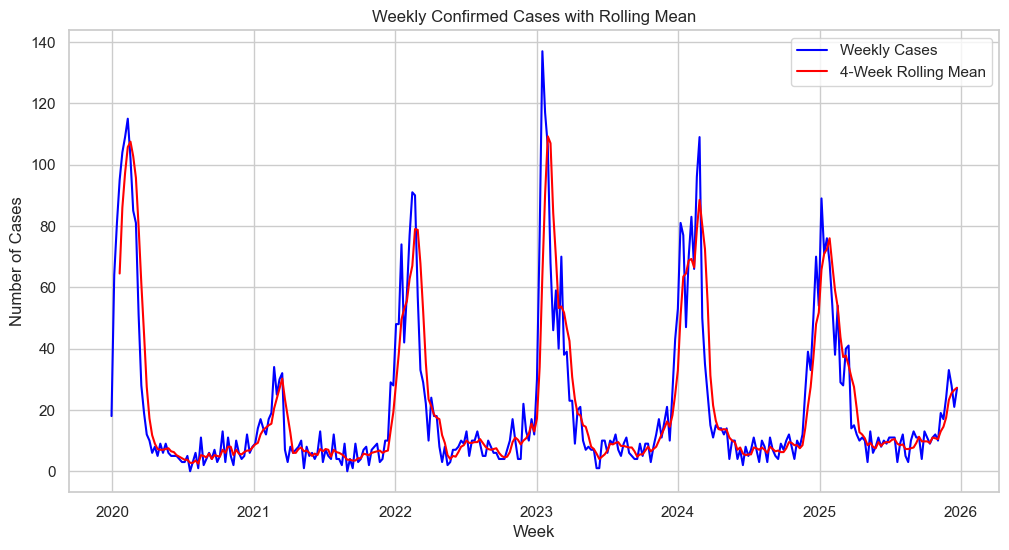

In [42]:
# Visualizing weekly confirmed cases and 4-week rolling mean - Let's see the true trend!

plt.figure(figsize=(12,6))
plt.plot(data['week_start_date'], data['confirmed_cases'], label='Weekly Cases', color='blue')
plt.plot(data['week_start_date'], data['rolling_mean_cases'], label='4-Week Rolling Mean', color='red')
plt.title('Weekly Confirmed Cases with Rolling Mean')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.legend()
# Matplotlib auto-extended my axis to 2026, hence the code.
# plt.xlim(data['week_start_date'].min(), data['week_start_date'].max())
plt.show()

Insight - Weekly confirmed cases flunctuate over time without a statistically significant long-term upward or downward trend.

Question 4 - What is the distribution of weekly confirmed cases?

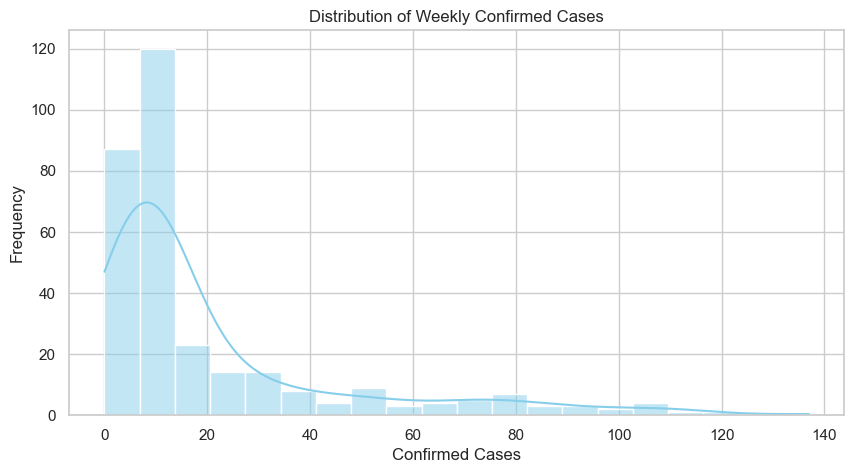

In [43]:
# Showing the distribution of weekly confirmed cases

plt.figure(figsize=(10,5))
sns.histplot(data['confirmed_cases'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Weekly Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()

Insight - Visual inspection suggests higher case counts in earlier weeks, followed by a gradual reduction over time. 

In [50]:
annual_summary['CFR'] = (annual_summary['deaths']/annual_summary['confirmed_cases']) * 100
annual_summary['CFR']

0    11.111111
1    13.395904
2    15.068493
3    13.819578
4    16.522423
5    15.897436
6    18.662953
Name: CFR, dtype: float64

Question 6 - What is the annual case fatality rate?

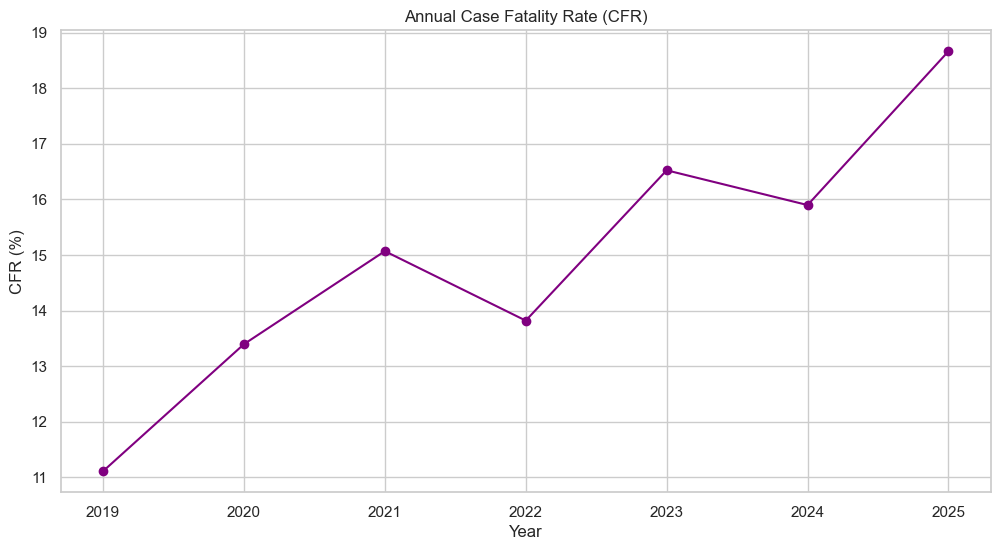

In [62]:
# Visualizing annual case fatality rate over time
# High cases is not equal to High CFR
# High CFR means more lethal outbreak.

plt.figure(figsize=(12,6))
plt.plot(annual_summary['year'], annual_summary['CFR'], marker='o', color='purple')
plt.title('Annual Case Fatality Rate (CFR)')
plt.xlabel('Year')
plt.ylabel('CFR (%)')
plt.show()

Insight - The visual showed 2025 to be the year with the highest annual CFR.

- As stated earlier, high cases do not equal to high CFR.

- 2024 showed the highest number of confirmed cases and deaths while 2025 showed the highest CFR;

- This means that; 2025 has the most lethal outbreaks. 

# Inferential Statistics 

- We rarely have all the data but we make use of the ones we have.

- To evaluate whether observed flunctuations represent genuine epidemiological patterns rather than random variation,

- Formal inferential statistical methods were applied.

- Analysis of Variance (ANOVA) was conducted to determine whether statistically significant differences exist across months (seasonality) and across years in case fatality rate (CFR).

- These methods provide objective evidence to support or refute visuals observed in the descriptive analysis, ensuring that conslusions are statistically justified and analytical robust. 

To test whether case counts differ significantly across months, a one-way ANOVA was conducted. 

In [60]:
# Seasonality - One-Way ANOVA

from scipy import stats

groups = [group['confirmed_cases'].values for name, group in data.groupby('month')]

f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

F-statistic: 54.89, p-value: 0.0000


- The extremely small p-value indicates strong statistical evidence of seasonal variation. 

- Thus, flunctuations observed in weekly data are strongly influenced by seasonal dynamics. 

To determine whether CFR differs significantly across years, ANOVA was applied. 

In [61]:
# Mortality Burden

cfr_groups = [group['CFR'].values for name, group in data.groupby('year')]

f_stat_cfr, p_value_cfr = stats.f_oneway(*cfr_groups)
print(f"F-statistic (CFR): {f_stat_cfr:.2f}, p-value: {p_value_cfr:.4f}")

F-statistic (CFR): 0.84, p-value: 0.5388


- Although flunctuations are observed visually,

- Statistical testing indicates that these differences are not significant.

- The p-value exceeds the conventional 0.05 threshold, indicating no statistically significant difference in CFR across years.

- This suggests that while CFR appears to vary from year to year, the differences are not strong enough to conclude that mortality risk has meaningfully changed over time. 

In [68]:
# Summary Table

trend_coef = model.params['time_index']
trend_p = model.pvalues['time_index']

anova_f = f_stat
anova_p = p_value

cfr_f = f_stat_cfr
cfr_p = p_value_cfr

# Creating DataFrame

summary_table = pd.DataFrame({
    "Analysis": ["Trend (Linear Regression)",
                "Seasonality (ANOVA - monthly)",
                "CFR Variation (ANOVA - yearly)"],
    "Test": ["Linear Regression", "ANOVA", "ANOVA"],
    "Statistic": [trend_coef, anova_f, cfr_f],
    "p-value": [trend_p, anova_p, cfr_p],
    "Interpretation": [
        "Increasing/decreasing trend",
        "Some months differ significantly",
        "CFR differs across years"
    ]
})
summary_table

print(summary_table.to_markdown(index=False))

| Analysis                       | Test              |   Statistic |     p-value | Interpretation                   |
|:-------------------------------|:------------------|------------:|------------:|:---------------------------------|
| Trend (Linear Regression)      | Linear Regression | -0.00036551 | 0.981881    | Increasing/decreasing trend      |
| Seasonality (ANOVA - monthly)  | ANOVA             | 54.8931     | 2.47037e-65 | Some months differ significantly |
| CFR Variation (ANOVA - yearly) | ANOVA             |  0.841305   | 0.538788    | CFR differs across years         |


# Saving All Descriptive Visuals

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set (style="whitegrid")

plots_to_save = {}

def plot_weekly_cases(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['week_start_date'], data['confirmed_cases'], label='Weekly Cases', color='blue')
    plt.plot(data['week_start_date'], data['rolling_mean_cases'], label='4-Week Rolling Mean', color='red')
    plt.title('Weekly Confirmed Cases with Rolling Mean')
    plt.xlabel('Week')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.savefig('weekly_cases_rolling_mean.png', dpi=300, bbox_inches='tight')
    plt.close()

plots_to_save['weekly_cases_rolling_mean'] = plot_weekly_cases


def plot_histogram(data):
    plt.figure(figsize=(10,5))
    sns.histplot(data['confirmed_cases'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Weekly Confirmed Cases')
    plt.xlabel('Confirmed Cases')
    plt.ylabel('Frequency')
    plt.savefig('confirmed_cases_histogram.png', dpi=300, bbox_inches='tight')
    plt.close()

plots_to_save['confirmed_cases_histogram'] = plot_histogram


def plot_monthly_boxplot(data):
    plt.figure(figsize=(12,6))
    sns.boxplot(x='month', y='confirmed_cases', data=data, palette='Pastel1')
    plt.title('Monthly Distribution of Confirmed Cases')
    plt.xlabel('Month')
    plt.ylabel('Weekly Cases')
    plt.savefig('monthly_boxplot.png', dpi=300, bbox_inches='tight')
    plt.close()

plots_to_save['monthly_boxplot'] = plot_monthly_boxplot

def plot_cfr_trend(data):
    plt.figure(figsize=(12,6))
    plt.plot(data['week_start_date'], data['CFR'], marker='o', color='purple')
    plt.title('Weekly Case Fatality Rate (CFR) Over Time')
    plt.xlabel('Week')
    plt.ylabel('CFR (%)')
    plt.savefig('CFR_trend.png', dpi=300, bbox_inches='tight')
    plt.close()

plots_to_save['CFR_trend'] = plot_cfr_trend

def plot_annual_summary(data):
    # Aggregate annually
    annual_data = data.groupby('year').agg({
        'confirmed_cases': 'sum',
        'deaths': 'sum'
    }).reset_index()

    fig, ax1 = plt.subplots(figsize=(12,6))

    # Bar plot for confirmed cases
    ax1.bar(annual_data['year'], annual_data['confirmed_cases'], 
            label='Confirmed Cases', color='steelblue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Confirmed Cases', color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')

    # Secondary axis for deaths
    ax2 = ax1.twinx()
    ax2.plot(annual_data['year'], annual_data['deaths'], 
             color='darkred', marker='o', linewidth=2, label='Deaths')
    ax2.set_ylabel('Deaths', color='darkred')
    ax2.tick_params(axis='y', labelcolor='darkred')

    plt.title('Annual Confirmed Cases and Deaths')
    fig.tight_layout()
    plt.savefig('annual_confirmed_cases_deaths.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

plots_to_save['annual_confirmed_cases_deaths'] = plot_annual_summary

def plot_annual_cfr(data):
    # Aggregate annually
    annual_data = data.groupby('year').agg({
        'confirmed_cases': 'sum',
        'deaths': 'sum'
    }).reset_index()

    # Compute annual CFR
    annual_data['CFR'] = (annual_data['deaths'] / annual_data['confirmed_cases']) * 100

    plt.figure(figsize=(12,6))
    plt.plot(annual_data['year'], annual_data['CFR'], 
             marker='o', color='purple', linewidth=2)

    plt.title('Annual Case Fatality Rate (CFR)')
    plt.xlabel('Year')
    plt.ylabel('CFR (%)')
    plt.savefig('annual_CFR_trend.png', dpi=300, bbox_inches='tight')
    plt.close()

plots_to_save['annual_CFR_trend'] = plot_annual_cfr
for func in plots_to_save.values():
    func(data)

print("All plots saved as PNGs in your working directory.")

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_8416\2889701612.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='confirmed_cases', data=data, palette='Pastel1')


All plots saved as PNGs in your working directory.


In [83]:
print(type(annual_summary))

<class 'function'>


## Saving the cleaned Dataset

In [57]:
data.to_csv('cleaned_lassa_fever_data.csv', index=False)

In [59]:
cleaned_data = pd.read_csv('cleaned_lassa_fever_data.csv')
cleaned_data.head()

,week_start_date,week_end_date,epi_year,epi_week,suspected_cases,confirmed_cases,probable_cases,deaths,year,month,quarter,week_of_year,time_index,CFR,rolling_mean_cases
0,2019-12-30,2020-01-05,2020,1,98,18,0,2,2019,12,4,1,0,11.111111,NaN
1,2020-01-06,2020-01-12,2020,2,158,64,0,12,2020,1,1,2,1,18.750000,NaN
2,2020-01-13,2020-01-19,2020,3,159,81,0,10,2020,1,1,3,2,12.345679,NaN
3,2020-01-20,2020-01-26,2020,4,318,95,3,19,2020,1,1,4,3,20.000000,64.5
4,2020-01-27,2020-02-02,2020,5,531,104,0,6,2020,1,1,5,4,5.769231,86.0
